# Big Hit prediction for video games

Based on data from 1996-2016, we tried to predict the genre of the big hit in the following year. 

## Hypothesis
_It is possible to predict the genre of the next big hit with significant accuracy based on statistical analysis for each of the following platforms: Xbox, Playstation, Nintendo and PC._

Our research questions were:

Kun je aan de hand van statistische analyse met significante zekerheid voorspellen wat voor genre en van welke publisher de volgende "Big hit" video game in 2017 van elke van de volgende: Xbox, PlayStation, Nintendo en PC komt?


In [59]:
import csv             
import numpy as np
import matplotlib.pyplot as plt       
import statsmodels.api as sm
from scipy.stats.stats import pearsonr

key_title = 'title'
key_platform = 'platform'
key_score = 'score'
key_release_y = 'release_year'
key_release_m = 'release_month'
key_release_d = 'release_day'
key_release_q = 'release_quarter'

key_rank = 'Rank'
key_genre = 'Genre'
key_publisher = 'Publisher'
key_NA = 'NA_Sales'
key_EU = 'EU_Sales'
key_JP = 'JP_Sales'
key_other = 'Other_Sales'
key_global = 'Global_Sales'
key_const = 'constant_one'

keys = [key_title, key_platform, key_score, key_release_y, key_release_m, key_release_d, key_release_q,\
        key_rank, key_genre, key_publisher, key_NA, key_EU, key_JP, key_other, key_global, key_const]

def beautify_dict(data):
    for i in range(0, len(data)):
        data[i][key_score] = float(data[i][key_score])
        data[i][key_rank] = int(data[i][key_rank])
        data[i][key_release_y] = int(data[i][key_release_y])
        data[i][key_release_m] = int(data[i][key_release_m])
        data[i][key_release_d] = int(data[i][key_release_d])
        data[i][key_release_q] = ['Q1', 'Q2', 'Q3', 'Q4'][(data[i][key_release_m] - 1) // 3]
        data[i][key_NA] = float(data[i][key_NA])
        data[i][key_EU] = float(data[i][key_EU])
        data[i][key_JP] = float(data[i][key_JP])
        data[i][key_other] = float(data[i][key_other])
        data[i][key_global] = float(data[i][key_global])
        data[i][key_const] = 1

def get_beautiful_dict(file_name):    
    fin = open(file_name, 'r')
    file_data = csv.DictReader(fin)

    data = [row for row in file_data]      
    beautify_dict(data)
    return data

def get_all_from_data(key, data):
    return [row[key] for row in data]

def get_unique_from_data(key, data):
    return list(set(get_all_from_data(key, data)))

def calc_r(data_set1, data_set2):
    r, p = pearsonr(data_set1, data_set2)
    return r

def calc_r_key(key1, key2, data):
    return calc_r(get_all_from_data(key1, data), get_all_from_data(key2, data))

def split_categorical_key(key, data):
    res_data = [dict() for row in data]
    
    categories = get_unique_from_data(key, data)
    
    for i, row in enumerate(res_data):
        for cat in categories:
            if cat == data[i][key]:
                row[cat] = 1
            else:
                 row[cat] = 0
    
    return categories, res_data

def from_lod_to_dol(data):
    res = dict()
    for key in data[0]:
        res[key] = [data[0][key]]
        
    for i in range(1, len(data)):
        for key in data[i]:
            res[key].append(data[i][key])
            
    return res


data = get_beautiful_dict('data/our_data.csv')
data_xbox = get_beautiful_dict('data/our_data_Xbox.csv')
data_playstation = get_beautiful_dict('data/our_data_PlayStation.csv')
data_nintendo = get_beautiful_dict('data/our_data_Nintendo.csv')
data_pc = get_beautiful_dict('data/our_data_PC.csv')


## The data
We combined two datasets from Kaggle.com, which were [Sales data](https://www.kaggle.com/gregorut/videogamesales) and [Review data](https://www.kaggle.com/egrinstein/20-years-of-games). When these two were combined, we had 7003 games spread out over the years 1996 - 2016. See the following graph for this distribution for the 4 major platforms.

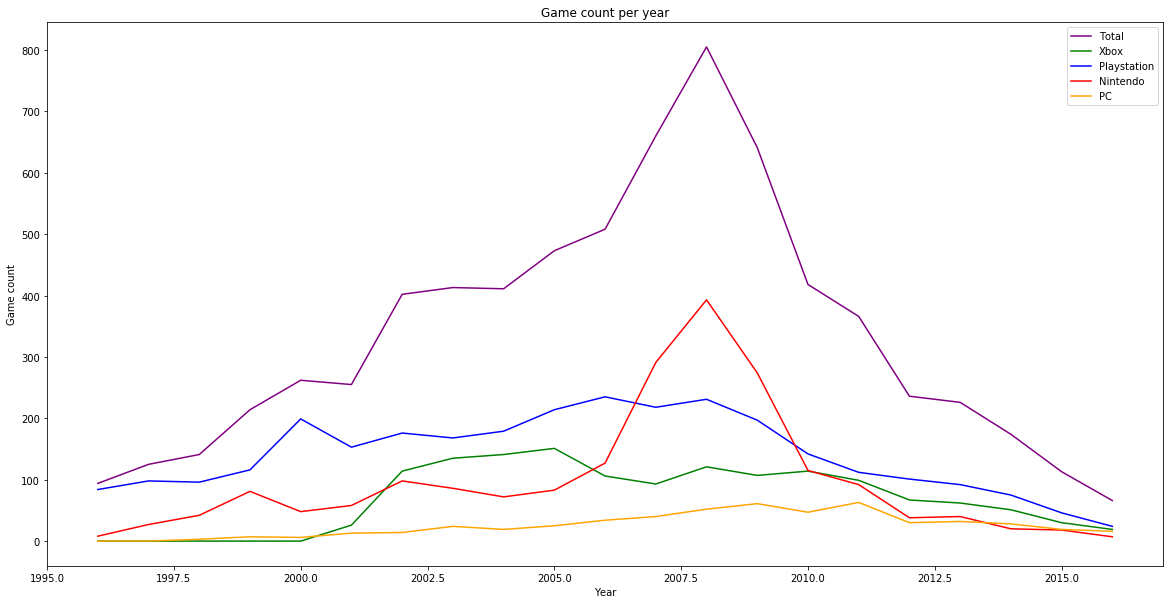

In [60]:

def plot_count_per_year(data, l, color):
    years = get_unique_from_data(key_release_y, data)
    count_per_year = [0 for y in range(1996, 2017)]
    for row in data:
        count_per_year[int(row[key_release_y]) - 1996] += 1

    plt.plot(range(1996, 2017), count_per_year, label=l, color=color)

plt.figure(figsize=(20, 10))
plot_count_per_year(data, 'Total', color='purple')
plot_count_per_year(data_xbox, 'Xbox', color='green')
plot_count_per_year(data_playstation, 'Playstation', color='blue')
plot_count_per_year(data_nintendo, 'Nintendo', color='red')
plot_count_per_year(data_pc, 'PC', color='orange')
plt.xlabel('Year')
plt.ylabel('Game count')
plt.title('Game count per year')
plt.legend()
plt.show()

### Different platforms favor different genres, as shown below
PC favors strategy games, but those are functually non-existend on other platforms. The Miscellaneous genre is quite big on the Nintendo platform.

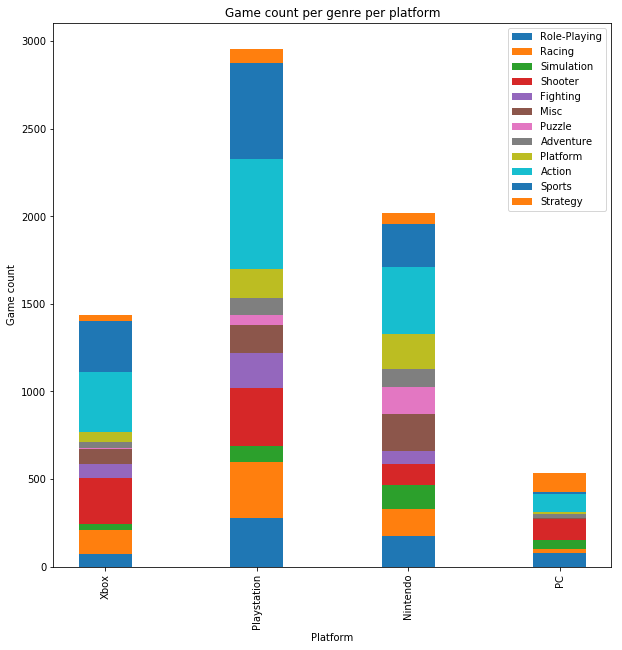

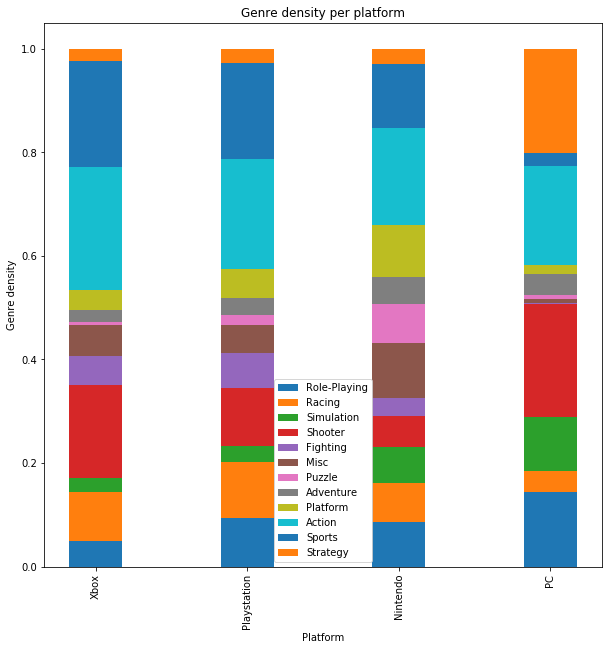

In [61]:
genres = get_unique_from_data(key_genre, data)

count_per_platform_per_genre = [[0 for _ in range(4)] for g in genres]
for i, g in enumerate(genres):
    for row in data_xbox:
        if row[key_genre] == g:
            count_per_platform_per_genre[i][0] += 1
    
    for row in data_playstation:
        if row[key_genre] == g:
            count_per_platform_per_genre[i][1] += 1            
    
    for row in data_nintendo:
        if row[key_genre] == g:
            count_per_platform_per_genre[i][2] += 1            
    
    for row in data_pc :
        if row[key_genre] == g:
            count_per_platform_per_genre[i][3] += 1
plots = []
plt.figure(figsize=(10, 10))

sum_so_far = [0 for _ in range(4)]
for i, genre in enumerate(genres):
    plots.append(plt.bar(range(4), count_per_platform_per_genre[i], 0.35, bottom = sum_so_far))
    sum_so_far = [s + count_per_platform_per_genre[i][j] for j, s in enumerate(sum_so_far)]

plt.ylabel('Game count')
plt.xlabel('Platform')
plt.title('Game count per genre per platform')
plt.xticks(range(4), ["Xbox", "Playstation", "Nintendo", "PC"], rotation='vertical')
plt.legend([p[0] for p in plots], genres)
plt.show()

# normalized version
plots = []
plt.figure(figsize=(10, 10))

total = [0 for _ in range(4)]
for i, genre in enumerate(genres):
    total = [s + count_per_platform_per_genre[i][j] for j, s in enumerate(total)]
    

sum_so_far = [0 for _ in range(4)]
for i, genre in enumerate(genres):
    plots.append(plt.bar(range(4), [c / total[j] for j, c in enumerate(count_per_platform_per_genre[i])] , 0.35, bottom = sum_so_far))
    sum_so_far = [s + count_per_platform_per_genre[i][j] / total[j] for j, s in enumerate(sum_so_far)]

plt.ylabel('Genre density')
plt.xlabel('Platform')
plt.title('Genre density per platform')
plt.xticks(range(4), ["Xbox", "Playstation", "Nintendo", "PC"], rotation='vertical')
plt.legend([p[0] for p in plots], genres)
plt.show()

### The genres of the big hit per platform per quarter per year

In [62]:

def find_max_saled_game_in_dict_with_key(dictio, key):
    max_val = 0.0
    max_row = None
    for row in dictio:
        if row[key] > max_val:
            max_val = float(row[key])
            max_row = row
    if max_row == None:
        max_row = {key_title: '---------', key_genre: '--', key_global: 0}
    return max_row

def get_big_hits_in_year(year, data, key):
    quarter1 = []
    quarter2 = []
    quarter3 = []
    quarter4 = []
    the_hit = []
    for row in data:
        if row[key_release_y] == year:
            if row[key_release_q] is 'Q1':
                quarter1.append(row)
            elif row[key_release_q] is 'Q2':
                quarter2.append(row)
            elif row[key_release_q] is 'Q3':
                quarter3.append(row)
            elif row[key_release_q] is 'Q4':
                quarter4.append(row)

    max1 = find_max_saled_game_in_dict_with_key(quarter1, key)
    max2 = find_max_saled_game_in_dict_with_key(quarter2, key)
    max3 = find_max_saled_game_in_dict_with_key(quarter3, key)
    max4 = find_max_saled_game_in_dict_with_key(quarter4, key)
    hit = find_max_saled_game_in_dict_with_key([max1, max2, max3, max4], key)
    
    return max1, max2, max3, max4, hit

def get_big_hits(data, key):
    big_hits = []
    for y in range(min_year, max_year):
        big_hits.append(get_big_hits_in_year(y, data, key))
        
    return big_hits

min_year = 2000
max_year = 2017

big_hits_xbox = get_big_hits(data_xbox, key_global)
big_hits_playstation = get_big_hits(data_playstation, key_global)
big_hits_nintendo = get_big_hits(data_nintendo, key_global)
big_hits_pc = get_big_hits(data_pc, key_global)
big_hits = get_big_hits(data, key_global)

print('Quarter : {:15} : {:15} : {:15} : {:15} : {:15}'.format('Xbox', 'Playstation', 'Nintendo', 'PC', 'All'))
print('--------:-----------------:-----------------:-----------------:-----------------:----------------')
for i in range(max_year - min_year):
    #print(y, ': ', big_hits[i][4][key_genre], ': ', big_hits[i][4][key_title])
    
    for q in range(4):
        print(q + 1, '      : ', 
              '{:15}: '.format(big_hits_xbox[i][q][key_genre]),
              '{:15}: '.format(big_hits_playstation[i][q][key_genre]), 
              '{:15}: '.format(big_hits_nintendo[i][q][key_genre]), 
              '{:15}: '.format(big_hits_pc[i][q][key_genre]), 
              '{:15}'.format(big_hits[i][q][key_genre]), )
    print('All     : ', 
          '{:15}: '.format(big_hits_xbox[i][q][key_genre]),
          '{:15}: '.format(big_hits_playstation[i][q][key_genre]), 
          '{:15}: '.format(big_hits_nintendo[i][q][key_genre]), 
          '{:15}: '.format(big_hits_pc[i][q][key_genre]), 
          '{:15}'.format(big_hits[i][q][key_genre]), )
        

Quarter : Xbox            : Playstation     : Nintendo        : PC              : All            
--------:-----------------:-----------------:-----------------:-----------------:----------------
1       :  --             :  Shooter        :  Strategy       :  Simulation     :  Strategy       
2       :  --             :  Role-Playing   :  Action         :  Strategy       :  Action         
3       :  --             :  Sports         :  Sports         :  Role-Playing   :  Sports         
4       :  --             :  Role-Playing   :  Action         :  Strategy       :  Role-Playing   
All     :  --             :  Role-Playing   :  Action         :  Strategy       :  Role-Playing   
1       :  --             :  Action         :  Role-Playing   :  Simulation     :  Action         
2       :  --             :  Sports         :  Platform       :  Simulation     :  Platform       
3       :  --             :  Sports         :  Puzzle         :  Role-Playing   :  Sports         
4       :  S

## Differences between platforms
There are some significant differences between the popularities of genres per platform as shown in the game count per genre bar chart above. This is te reason why we split up our data.

### Heatmap of the similarity between platforms using mean sales per genre

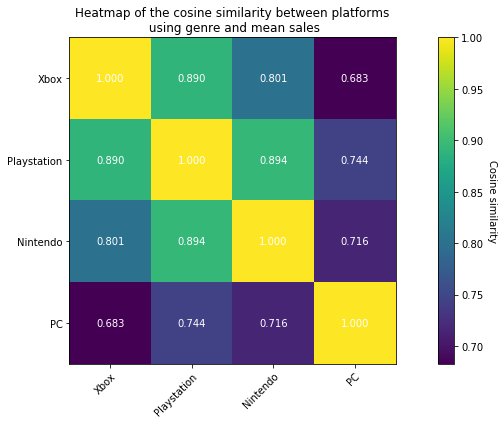

In [63]:
# define the functions needed to calculate the cosine similarity
def magnitude(v):
    sqr_mag = 0
    for val in v:
        sqr_mag += val * val
    return sqr_mag ** (1/2)

def normalized(v):
    mag = magnitude(v)
    return [val / mag for val in v]

def dot(v1, v2):
    d = 0
    for i in range(len(v1)):
        d += v1[i] * v2[i]
    return d
    
def cos_sim(v1, v2):
    norm_v1 = normalized(v1)
    norm_v2 = normalized(v2)
    return dot(norm_v1, norm_v2)

def mean(v):
    return sum(v)/len(v)

def lerp(a, b, v):
    #return (b - a) * v + a #this is faster but not numerically stable with a large difference between a and b
    return a * (1 - v) + b * v

def percentile(values, alpha):
    if len(values) == 0:
        return 0
    if len(values) == 1:
        return values[0]
    
    s = sorted(values)
    l = len(values) - 1
    
    idx_start = int(l * alpha)
    idx_end = idx_start + 1
    
    a = s[idx_start]
    b = s[idx_end]
    
    # linearly interpolate between the two values
    p_start = idx_start / l
    p_end = idx_end / l
    return lerp(a, b, (alpha - p_start) / (p_end - p_start))

# get the median of the value per categorie
def get_cat_mean_val(key_cat, key_val, data):
    # get the unique categories and create a dict with an empty list for each categorie
    categories = get_unique_from_data(key_cat, data)
    d = {}
    for cat in categories:
        d[cat] = []
        
    # store all values from the data set in the dictionary
    for row in data:
        d[row[key_cat]].append(row[key_val])
        
    # return a list of means
    return [mean(d[cat]) for cat in categories]

def show_cos_sim_heatmap(dic, bar_label, title):    
    labels = [key for key in dic]

    values = [[1.0 for key in dic] for key in dic]
    for i, key_i in enumerate(dic):
        for j, key_j in enumerate(dic):
            if i is not j:
                values[i][j] = cos_sim(dic[key_i], dic[key_j])


    fig, ax = plt.subplots(figsize=(12, 6))
    im = ax.imshow(values)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, "{:.3f}".format(values[i][j]),
                       ha="center", va="center", color="w")

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel(bar_label, rotation=-90, va="bottom")

    ax.set_title(title)
    fig.tight_layout()
    plt.show()


# get the data
genres, genre_data = split_categorical_key(key_genre, data)
quarters, quarter_data = split_categorical_key(key_release_q, data)

genres = get_unique_from_data(key_genre, data)
quarters = get_unique_from_data(key_release_q, data)

# heatmap genre sales
genre_sales_dict = {
    "Xbox":get_cat_mean_val(key_genre, key_global, data_xbox),
    "Playstation":get_cat_mean_val(key_genre, key_global, data_playstation),
    "Nintendo":get_cat_mean_val(key_genre, key_global, data_nintendo),
    "PC":get_cat_mean_val(key_genre, key_global, data_pc)
}
show_cos_sim_heatmap(genre_sales_dict, "Cosine similarity", "Heatmap of the cosine similarity between platforms\n using genre and mean sales")


As you can see, the biggest difference is between Xbox and PC. This is a surprise, since both are owned by microsoft (gaming on MacOS and Linux are ignored here because most games are played on Windows PCs). Xbox and Playstation, and Playstation and Nintendo are quite similar.

### Projected growth of genre sales
Here are five plots showing the past growth of genres, and the predicted growth up to 2018. We made the line fade away if the fitted model had a low adjusted $r^2$, so if you have to squint to see it, it probably isn't worth seeing.

The dominance of the shooter genre is obvious. It is pretty visible compared to the other lines so it one of the most secure fits, and it rises above all other genres for all platforms but Nintendo. There, the platform genre is the best selling one.

Xbox:


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars


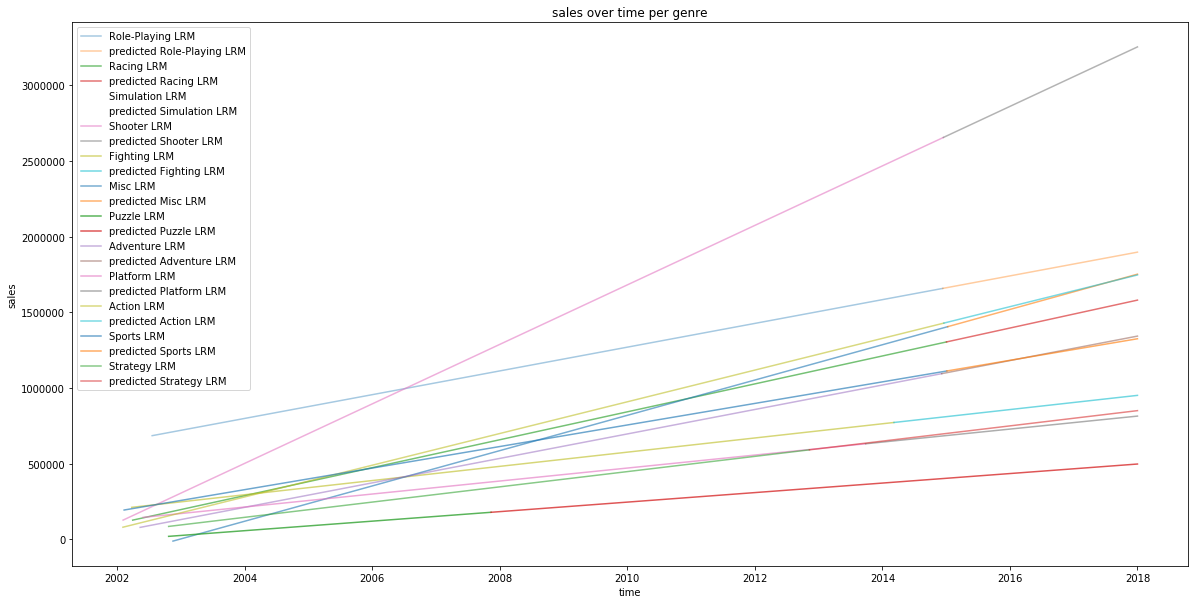

playstation:


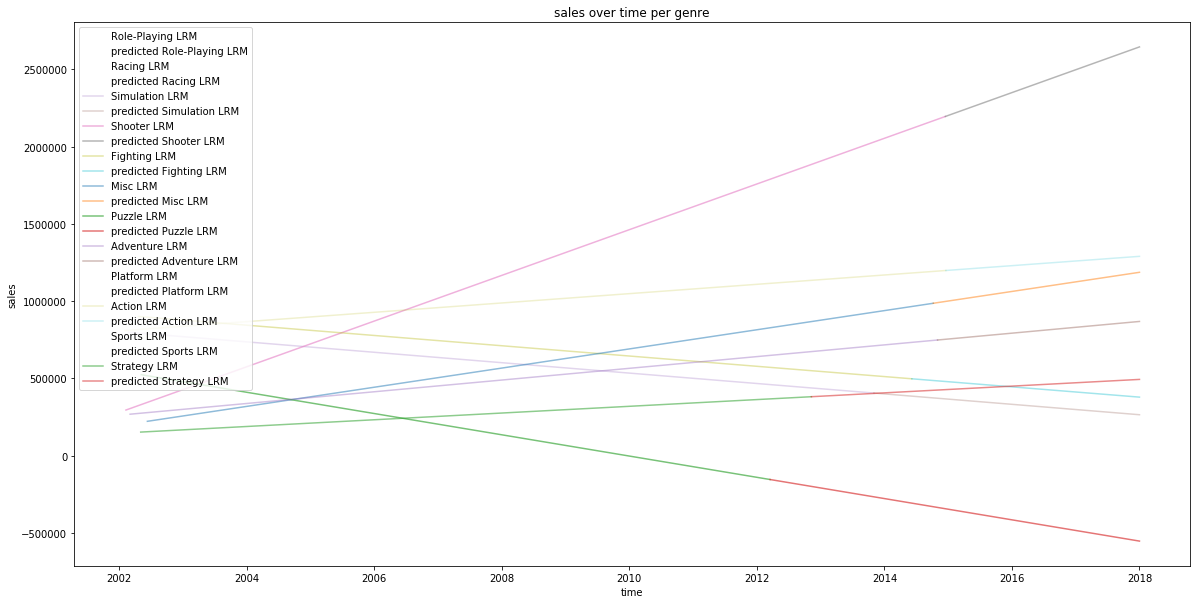

Nintendo:


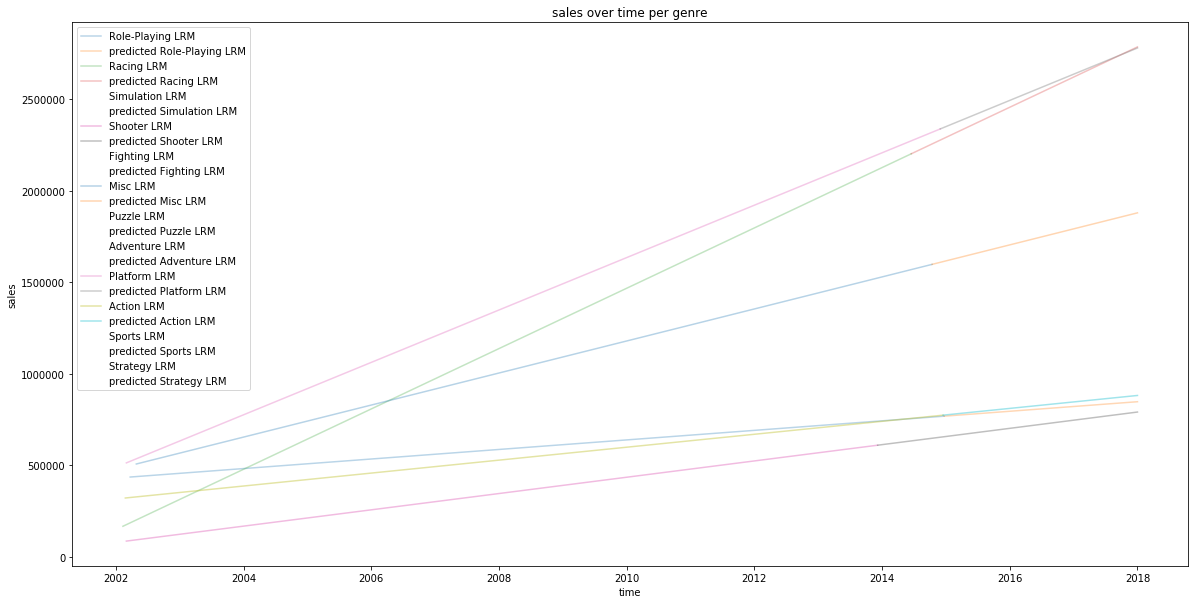

PC:


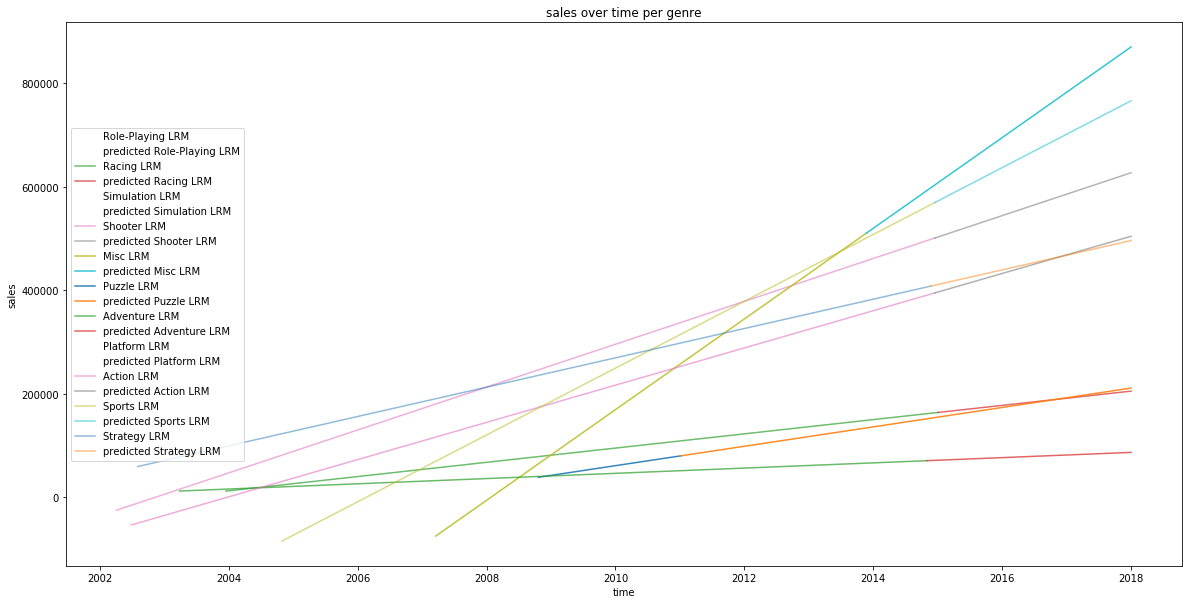

All:


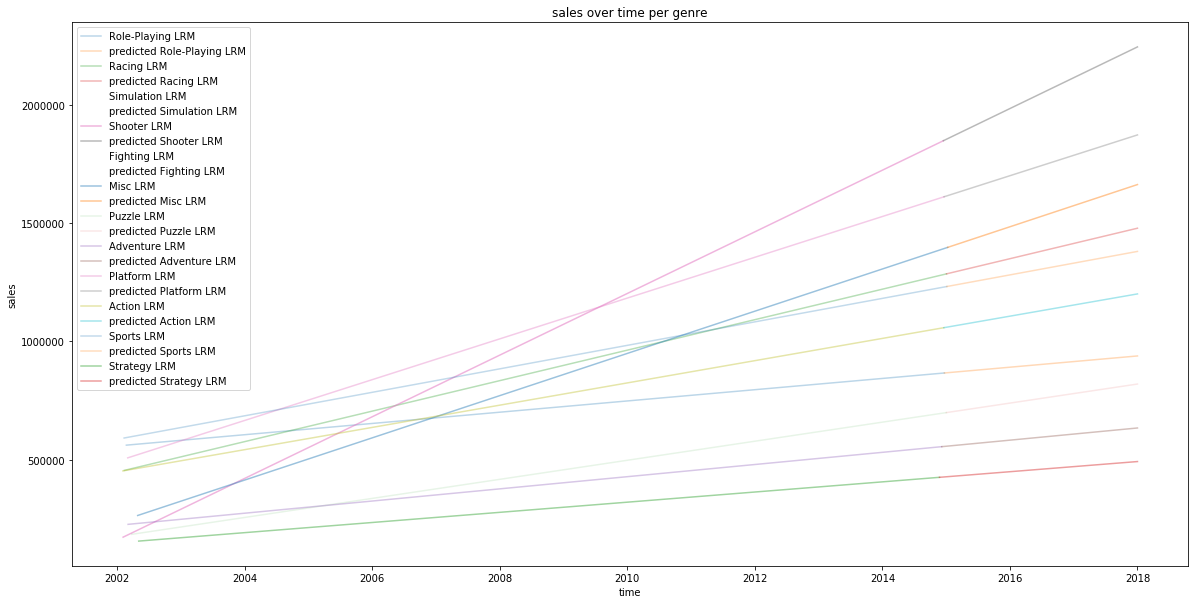

In [65]:
days_per_month = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
genres = get_unique_from_data(key_genre, data)

def get_continuous_year(game):
    y = int(game[key_release_y])
    m = int(game[key_release_m])
    d = int(game[key_release_d])
    return y + m / 12 + (d / 12) / days_per_month[m - 1]

def plot_sales_over_time_for_genre(genre, data, year_min = 2002, year_max = 2014, year_predict = 2018, plot_points = False, alpha_exp = 0.2):
    dates = []
    min_date = 9999
    max_date = 0
    sales = []
    for row in data:
        if row[key_genre] == genre:
            year = int(row[key_release_y])
            if year <= year_max and year >= year_min:
                date = get_continuous_year(row)
                dates.append(date)
                sales.append(row[key_global] * 1000000)

                if min_date > date:
                    min_date = date
                if max_date < date:
                    max_date = date            
    
    if(len(sales) < 2):
        return
    else:
        results = sm.OLS(sales, sm.add_constant(dates)).fit()
        x_line = np.linspace(min_date, max_date, 100)
        y_line = [x * results.params[1] + results.params[0] for x in x_line]
        x_predict = np.linspace(max_date, year_predict, 100)
        y_predict = [x * results.params[1] + results.params[0] for x in x_predict]
        if plot_points:
            plt.scatter(dates, sales, label = genre)
        plt.plot(x_line, y_line, label = genre + ' LRM', alpha = results.rsquared_adj ** alpha_exp)  
        plt.plot(x_predict, y_predict, label = 'predicted ' + genre + ' LRM', alpha = results.rsquared_adj ** alpha_exp)    
    
def show_sales_over_time_per_genre(data, year_min = 2002, year_max = 2014, year_predict = 2018, plot_points = False):
    plt.figure(figsize=(20, 10))
    for g in genres:
        plot_sales_over_time_for_genre(g, data, year_min, year_max, year_predict, plot_points)
    plt.xlabel('time')
    plt.ylabel('sales')
    plt.title('sales over time per genre')
    plt.legend()
    plt.show()

print('Xbox:')
show_sales_over_time_per_genre(data_xbox)
print('playstation:')
show_sales_over_time_per_genre(data_playstation)
print('Nintendo:')
show_sales_over_time_per_genre(data_nintendo)
print('PC:')
show_sales_over_time_per_genre(data_pc)
print('All:')
show_sales_over_time_per_genre(data)